### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('datasets/PimaIndians_processed.csv')

diabetes_data.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
5,0.529718,1.407219,0.107109,-0.965953,0.159608,-1.038117,0.185349,1.976412,1
6,-1.029213,-0.150141,1.068636,1.699951,0.623000,1.811417,0.081015,0.013271,1
7,-0.717427,-0.636816,-3.258237,0.843053,-0.615520,1.455225,-0.985506,0.209585,0
8,-0.717427,-0.247476,-0.053146,0.081366,-0.505991,0.215678,0.017256,0.111428,1
9,-0.093854,0.109419,1.389146,1.128686,0.665127,0.885318,0.524433,-0.379357,0


In [3]:
FEATURES = list(diabetes_data.columns[:-1])

FEATURES

['pregnant',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'diabetes',
 'age']

### Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [7]:
from sklearn.decomposition import PCA

def apply_pca(n):
    
    pca = PCA(n_components = n) 
    x_new = pca.fit_transform(diabetes_data[FEATURES])
        
    return pca, pd.DataFrame(x_new)

In [8]:
pca_obj, _ = apply_pca(8)

In [9]:
print("Explained Variance:", pca_obj.explained_variance_ratio_)

Explained Variance: [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422 0.03707119]


In [10]:
sum(pca_obj.explained_variance_ratio_)

0.9999999999999999

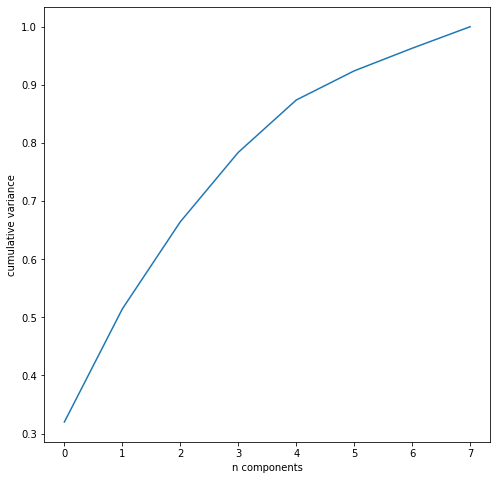

In [11]:
plt.figure(figsize = (8, 8))

plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [12]:
Y = diabetes_data['test']

In [22]:
_ , X_new = apply_pca(8)

In [23]:
X_new.sample(10)

,0,1,2,3,4,5,6,7
100,-1.564838,0.671199,-0.384021,-0.377512,0.330458,0.090439,0.129147,-0.032552
372,1.001349,-0.554330,-1.507576,-0.638703,-0.267339,0.100334,0.470750,0.521861
104,0.000062,0.664995,-0.565911,0.452366,1.111325,0.023433,-0.227000,-0.714987
15,-2.732329,-0.956404,0.122499,-0.114360,0.138169,0.197722,0.455268,-0.228969
2,-1.734034,0.171954,-0.505743,0.248924,1.628413,0.399817,-0.186551,0.022830
226,-1.849690,-0.648225,0.256446,0.354021,-1.228612,0.102352,0.139580,0.382493
338,-1.877447,-0.116912,-0.097469,-0.404460,0.994486,-0.258530,-1.375029,-0.359846
48,-1.530388,0.397260,-1.037458,0.342512,0.997196,0.009523,0.201960,-0.043798
60,0.318001,-0.238284,-0.625016,-0.706847,-1.175256,0.238899,0.070896,1.095716
199,-0.188285,-0.182985,0.006922,0.035386,0.366241,0.671162,-0.338710,1.344721


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [28]:
accuracy_score(y_test, y_pred)

0.810126582278481

In [29]:
precision_score(y_test, y_pred)

0.7692307692307693

In [30]:
recall_score(y_test, y_pred)

0.6896551724137931

In [31]:
_ , X_new = apply_pca(4)

In [32]:
X_new.sample(10)

,0,1,2,3
318,-3.257839,-1.097613,-0.338189,-0.013154
137,-2.386167,-1.337533,0.196566,0.258238
250,3.109963,0.689746,0.888182,0.951787
313,-2.103897,-0.680219,0.979119,-1.060121
249,1.205638,2.059321,1.772163,-0.797662
254,1.830118,-2.499328,0.461693,-0.710026
360,-0.006946,0.560301,0.113017,-0.504967
183,1.069368,-0.591353,-1.078032,-1.454069
271,-1.414223,0.068825,0.854825,0.553973
224,-0.787441,-0.030685,-0.182204,-0.517953


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [37]:
accuracy_score(y_test, y_pred)

0.810126582278481

In [38]:
precision_score(y_test, y_pred)

0.7857142857142857

In [39]:
recall_score(y_test, y_pred)

0.4782608695652174